# Exploratory data analysis
## German credit data dataset

### Packages

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from pandas_profiling import ProfileReport
warnings.filterwarnings('ignore')

### Loading data

In [3]:
# grain setting guarantees the reproductibility of results
np.random.seed(123) 

# loading data
data = pd.read_csv('german_credit_data_dataset.csv')
data.head()

mata_data = pd.read_csv('attributes_german_credit_data.csv')
mata_data

,name,type,description
0,checking_account_status,string,Status of existing checking account (A11: < 0 ...
1,duration,integer,Duration in month
2,credit_history,string,A30: no credits taken/ all credits paid back d...
3,purpose,string,"Purpose of Credit (A40 : car (new), A41 : car ..."
4,credit_amount,float,NaN
5,savings,string,"Savings in accounts/bonds (A61 : < 100 DM, A62..."
6,present_employment,string,"A71 : unemployed, A72 : < 1 year, A73 : 1 <= x..."
7,installment_rate,float,Installment Rate in percentage of disposable i...
8,personal,string,Personal Marital Status and Sex (A91 : male : ...
9,other_debtors,string,"A101 : none, A102 : co-applicant, A103 : guara..."


In [25]:
# Both numerical and categorical data appear in the set. 

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_account_status    1000 non-null object
duration                   1000 non-null int64
credit_history             1000 non-null object
purpose                    1000 non-null object
credit_amount              1000 non-null float64
savings                    1000 non-null object
present_employment         1000 non-null object
installment_rate           1000 non-null float64
personal                   1000 non-null object
other_debtors              1000 non-null object
present_residence          1000 non-null float64
property                   1000 non-null object
age                        1000 non-null float64
other_installment_plans    1000 non-null object
housing                    1000 non-null object
existing_credits           1000 non-null float64
job                        1000 non-null object
dependents                 1000 non-null int64
telephone                  

In [27]:
# no null objects, data does not require cleaning
# customer type variable (int) is nominal!!!

### Balans klas

In [28]:
# Customer type variable is a label in our set. Let's check it's distribution. 

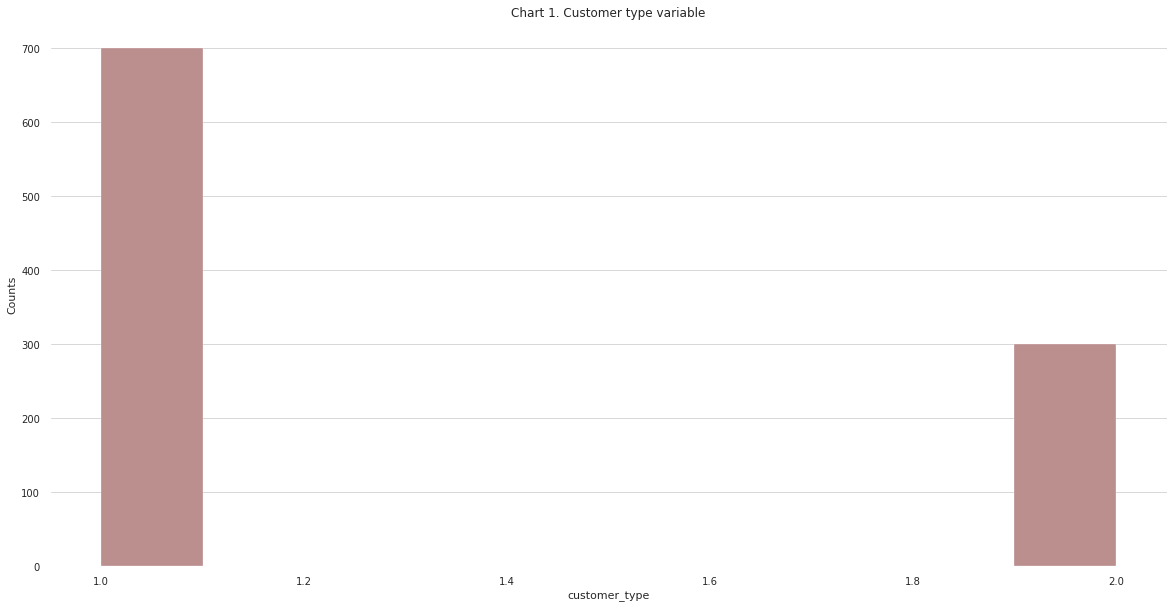

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))

data.customer_type.plot.hist(color='rosybrown', legend = False)
plt.title('Chart 1. Customer type variable')
plt.xlabel('customer_type')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

The ratio of reliable and unreliable customers is 7:3.

### Profile

In [30]:
profile = ProfileReport(data, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

### Attributes selection

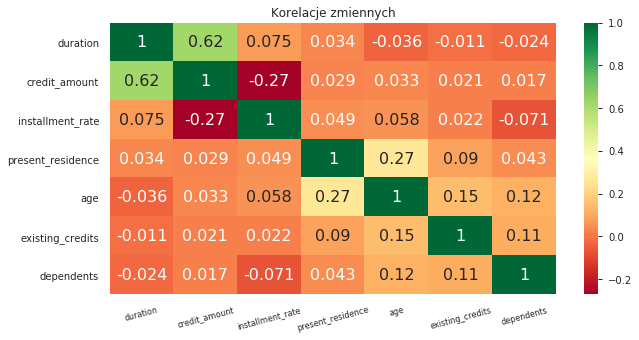

In [4]:
num = data.select_dtypes(include=['float64', 'int']).drop('customer_type', axis = 1).columns

fig, ax = plt.subplots(figsize = (10, 5))
corr = data[num].corr()
# only for numerical variables!
g = sns.heatmap(corr,
           xticklabels = corr.columns,
           yticklabels = corr.columns, 
           annot = True,
           cmap = 'RdYlGn',
           annot_kws={"size": 16})
ax.set_title('Korelacje zmiennych')
g.set_xticklabels(g.get_xticklabels(), rotation = 15, fontsize = 8)
plt.savefig('corr.png')

In [32]:
# Data in general poorly correlated

# Let's consider the variables duration, credit_amount installment_rate and the relationships between them

In [33]:
data.head()


,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
0,A11,6,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1,A192,A201,1
1,A12,48,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1,A191,A201,2
2,A14,12,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2,A191,A201,1
3,A11,42,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2,A191,A201,1
4,A11,24,A33,A40,4870.0,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2,A191,A201,2



### Duration (in month)

Text(0.5, 1.0, 'Chart 2. Duration - distribution')

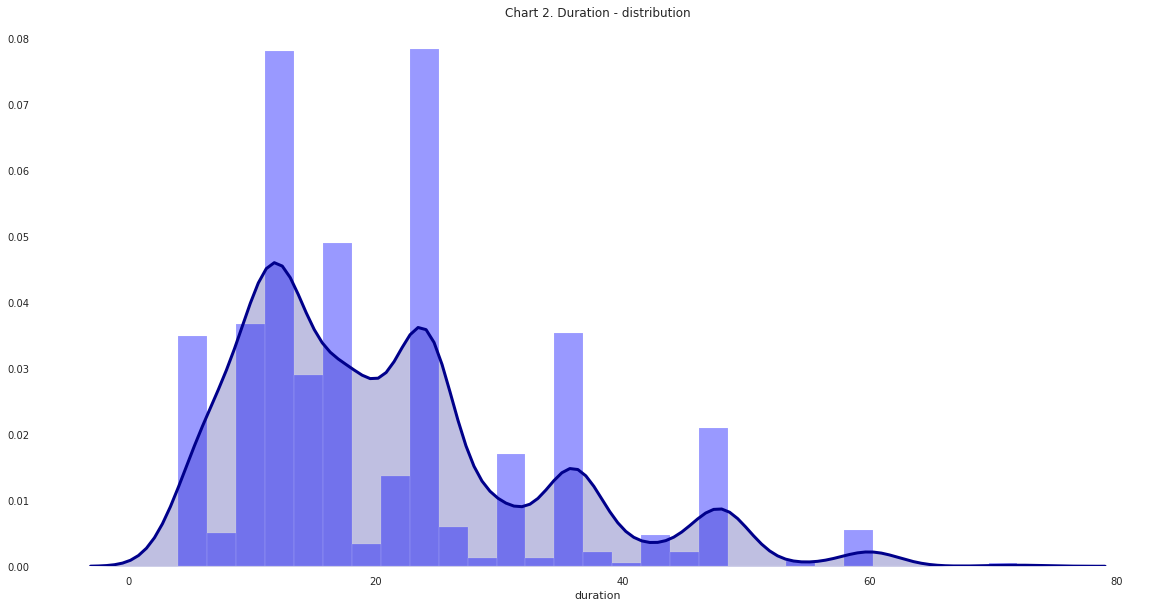

In [34]:
sns.set_color_codes()
fig, ax = plt.subplots(figsize=(20, 10))

duration_dens = sns.distplot(data.duration, hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3, 'color': 'darkblue'}, color='blue')
duration_dens.set_title('Chart 2. Duration - distribution')

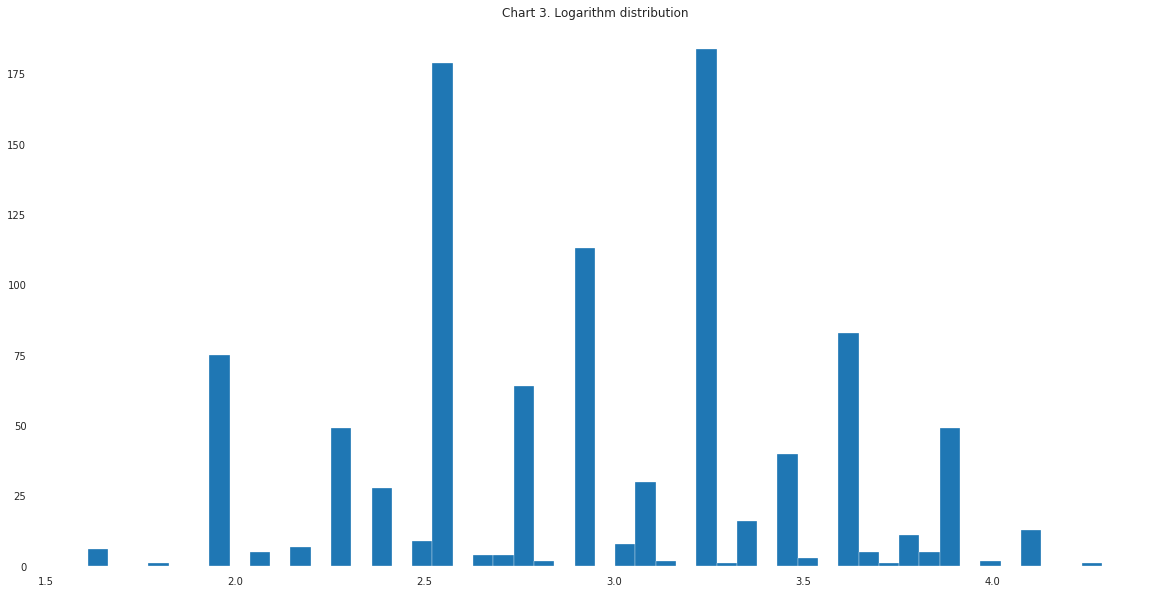

In [35]:
fig, ax = plt.subplots(figsize=(20, 10))

price_after_log=np.log1p(data.duration)
plt.hist(price_after_log, bins=50)
plt.title('Chart 3. Logarithm distribution')
plt.show()

Multimodal distribution, difficult to estimate even after log in.

Q1 = 12.0 Q3 = 24.0 min = 4 max = 72


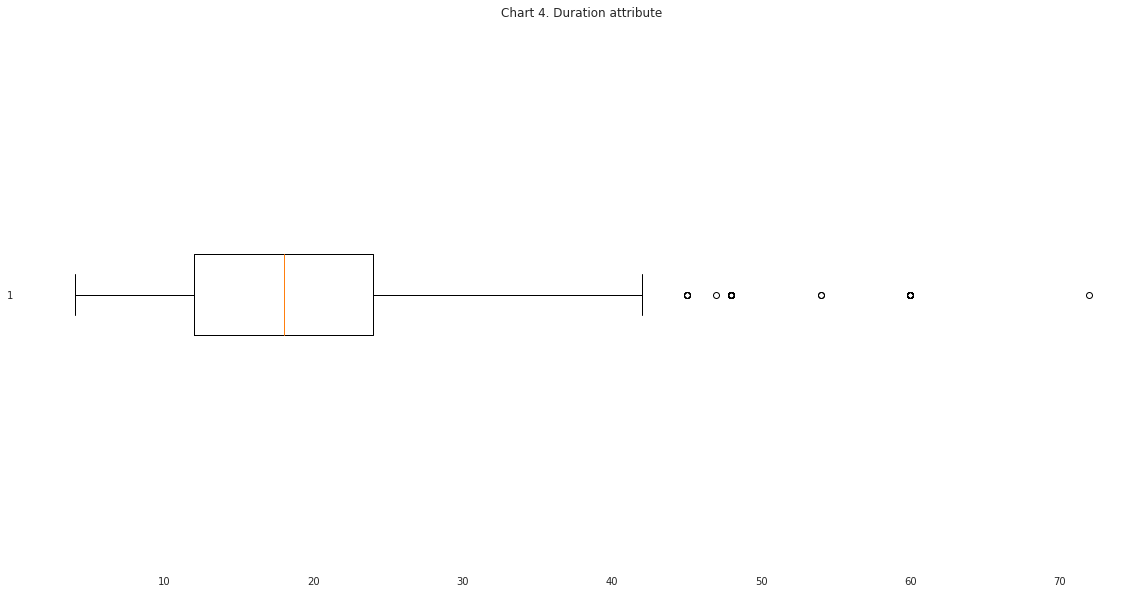

In [36]:
fig1, ax1 = plt.subplots(figsize = (20, 10))
ax1.set_title('Chart 4. Duration attribute')
ax1.boxplot(data.duration, vert=False)

print('Q1 = %s' % np.percentile(data.duration, 25),'Q3 = %s' %np.percentile(data.duration, 75),
      'min = %s' % np.min(data.duration), 'max = %s' % np.max(data.duration))

The majority of the population is above the median of the examined feature.  
Few outliers.  
Significant dispersion of data, with moderate interquartile range.

### Credit amount

Text(0.5, 1.0, 'Chart 5. Credit amount - distribution')

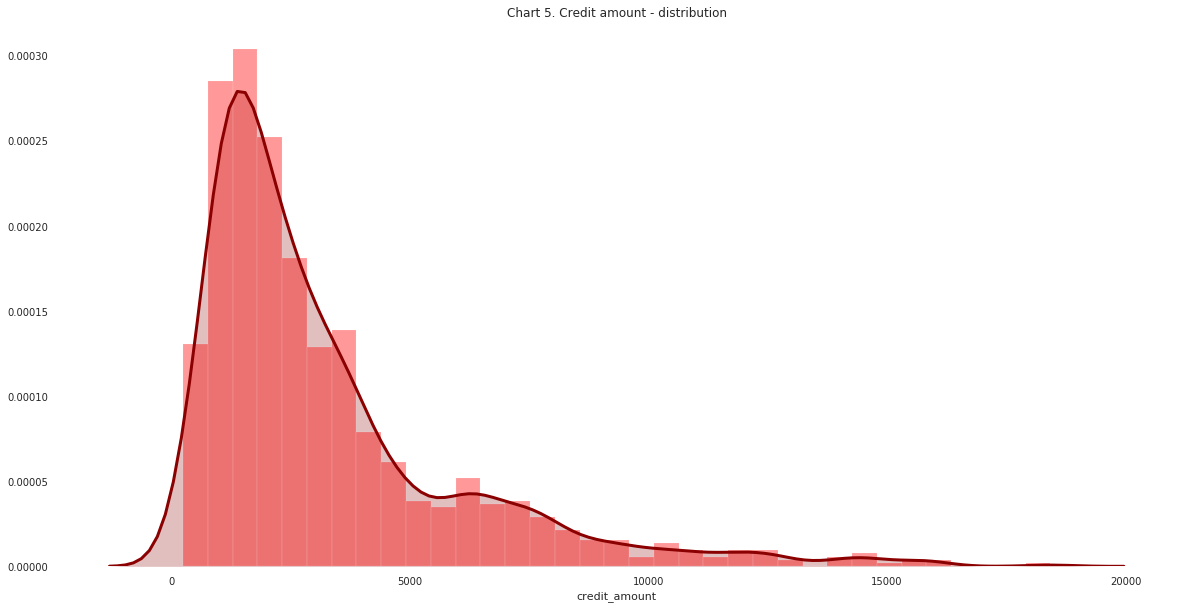

In [37]:
sns.set_color_codes()
fig, ax = plt.subplots(figsize=(20, 10))

amount_dens = sns.distplot(data.credit_amount, hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3, 'color': 'darkred'}, color='red')
amount_dens.set_title('Chart 5. Credit amount - distribution')

The graph indicates a single-modal distribution. Given the shape of the histogram, we can conclude that it is close to exponential.

A clearly shifted density curve to the left suggests a positive asymmetry value. A positive value of this coefficient indicates right-sided asymmetry, which says that the arithmetic mean of the feature is greater than the median and that the majority of the population is classified above the average level of the feature being examined.

In [38]:
# Let's examine the presence of outliers and the location of central characteristics

Q1 = 1365.5 Q3 = 3972.25 min = 250.0 max = 18424.0


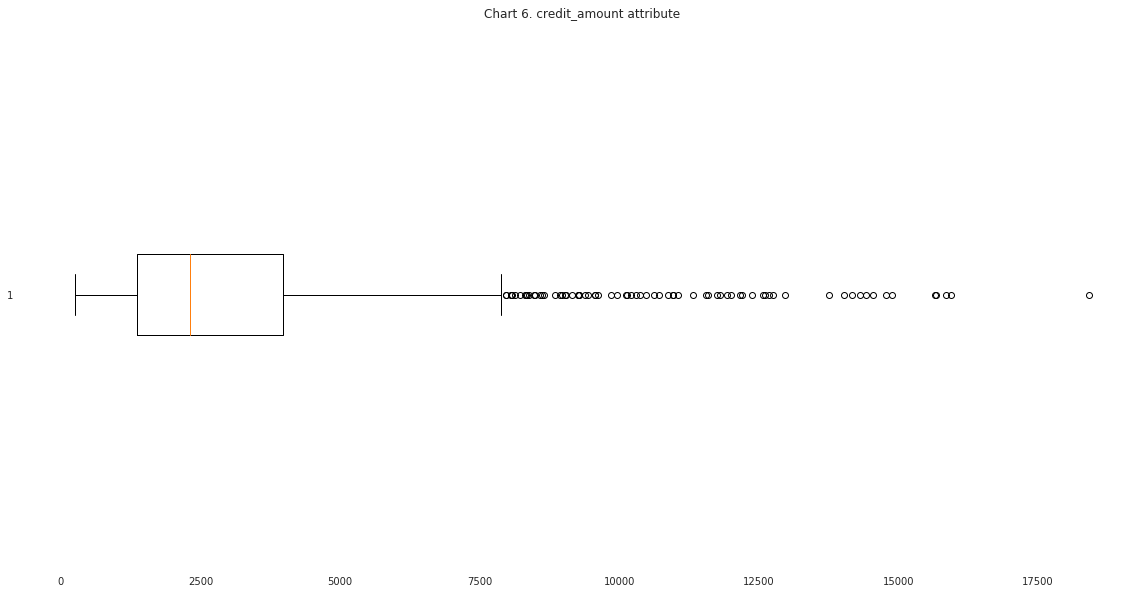

In [39]:
fig1, ax1 = plt.subplots(figsize = (20, 10))
ax1.set_title('Chart 6. credit_amount attribute')
ax1.boxplot(data.credit_amount, vert=False)

print('Q1 = %s' % np.percentile(data.credit_amount, 25),'Q3 = %s' %np.percentile(data.credit_amount, 75),
      'min = %s' % np.min(data.credit_amount), 'max = %s' % np.max(data.credit_amount))

Due to the multitude of outliers observed in further exploration, outlier-insensitive characteristics should be chosen.

### Relationship between duration and credit_amount variables.

In [40]:
# positive correlation coefficient

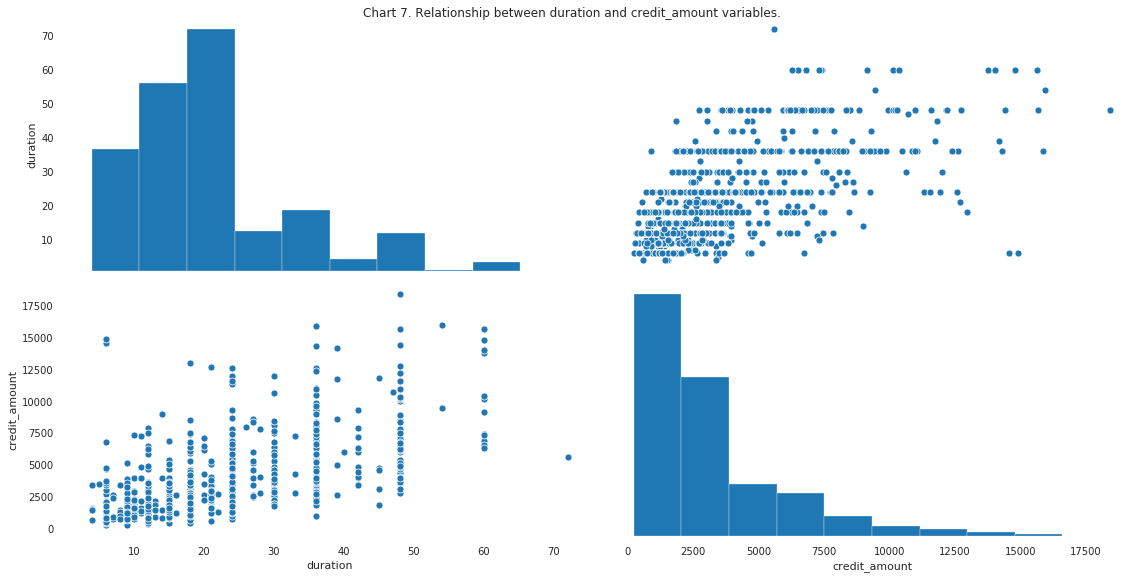

In [41]:
ax = sns.pairplot(data.iloc[:, [1, 4]], size = 4, aspect=2, palette=('cubehelix'), 
                  markers='o')
ax.fig.suptitle('Chart 7. Relationship between duration and credit_amount variables.', y = 1)
plt.tight_layout()

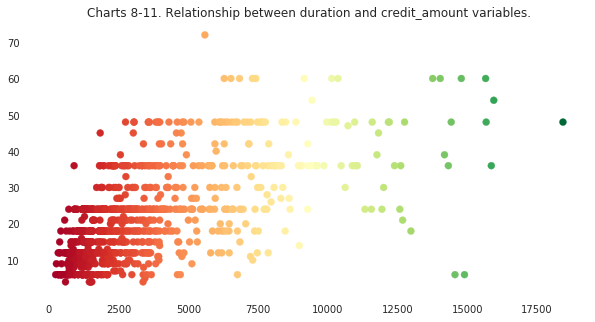

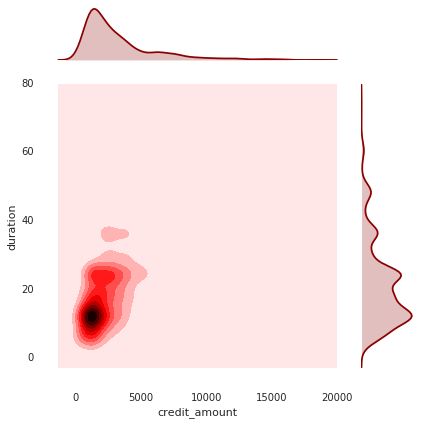

In [42]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.set_title('Charts 8-11. Relationship between duration and credit_amount variables.')

sctr = ax.scatter(data.credit_amount, data.duration, c = data.credit_amount, cmap = 'RdYlGn')
sns.jointplot(x=data["credit_amount"], y=data["duration"], kind='kde', color = 'darkred')

The part of the population with the lowest loan amounts has the shortest repayment time.  
The opposite conclusion does not apply.  
It happens that entities with relatively high loan amounts have a short repayment period and those with low loans have a long repayment period.

Text(0.5, 0.98, 'Chart 12. Relationship between duration and credit_amount variables.')

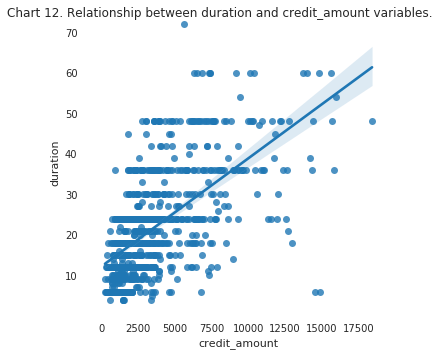

In [43]:
sns.lmplot(x = 'credit_amount', y = 'duration', data = data).fig.suptitle('Chart 12. Relationship between duration and credit_amount variables.')

The positivity of the directional coefficient of the line results from the positivity of the correlation coefficient.  
The slope of the line means that the higher the loan amount is, the longer the repayment time turns out to be.

### Installment rate (in percentage of disposable income)

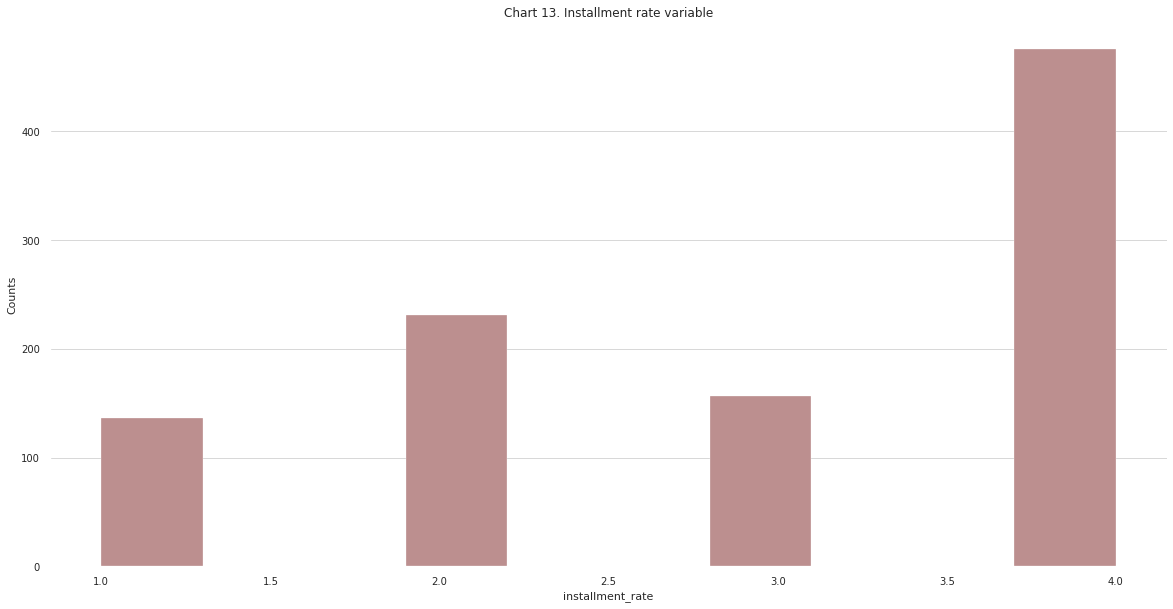

In [44]:
fig, ax = plt.subplots(figsize=(20, 10))

data.installment_rate.plot.hist(color='rosybrown', legend = False)
plt.title('Chart 13. Installment rate variable')
plt.xlabel('installment_rate')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

### Relationship between installment_rate and credit amount variables.

In [45]:
# negative correlation coefficient

Text(0.5, 1.0, 'Chart 14. Relationship between installment_rate and credit amount variables.')

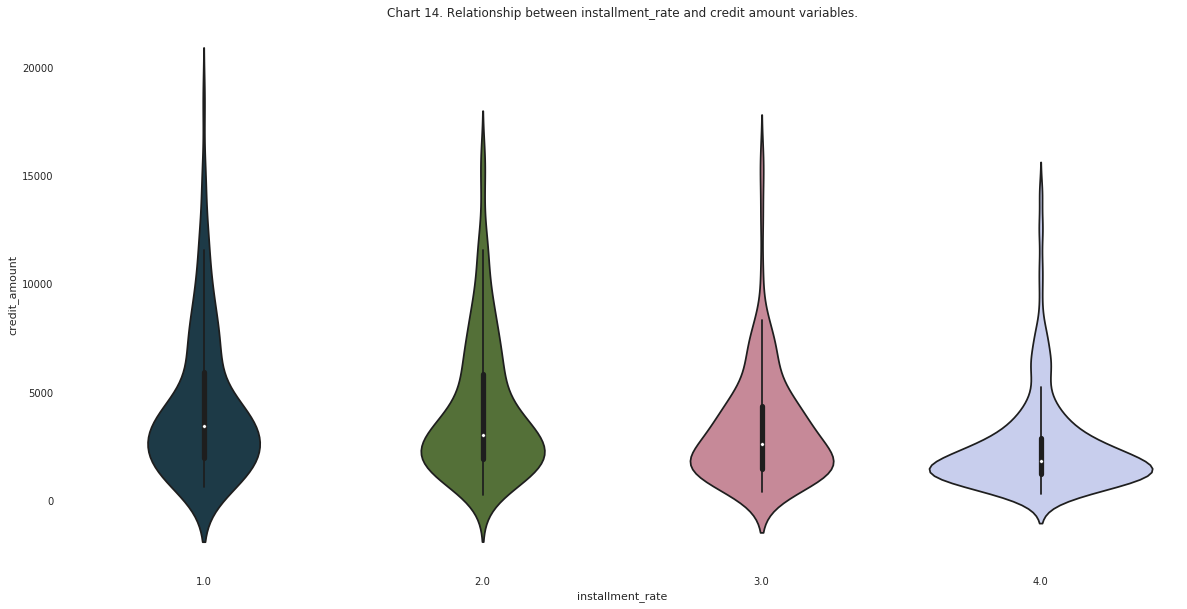

In [46]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.violinplot(data.installment_rate, data.credit_amount, palette=('cubehelix')).set_title('Chart 14. Relationship between installment_rate and credit amount variables.')

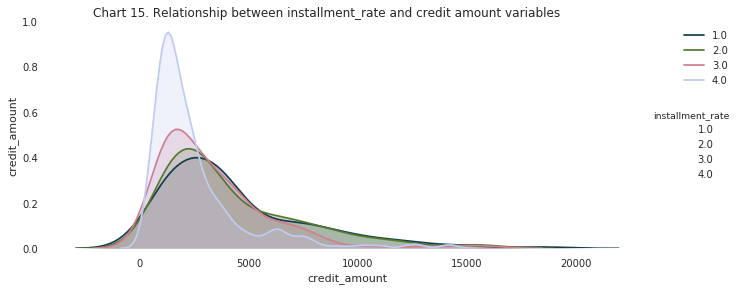

In [47]:
ax = sns.pairplot(data.iloc[:, [4, 7]], size = 4, hue = 'installment_rate', aspect=2, palette=('cubehelix'), 
                  markers='o')
ax.fig.suptitle('Chart 15. Relationship between installment_rate and credit amount variables', y = 1)
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(1.10, 1.0), ncol=1) #vertical legend

People with lower loan amounts spend a higher percentage of their income on repayment.  

The higher the loan amount, the lower the percentage - rather obvious

### What age groups dominate among borrowers?

Text(0.5, 1.0, 'Chart 16. Age - distribution')

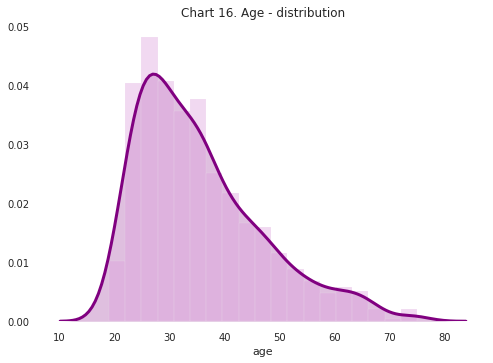

In [48]:
sns.set_color_codes()
age_dens = sns.distplot(data.age, hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3, 'color': 'purple'}, color='plum')
age_dens.set_title('Chart 16. Age - distribution')

Right-sided asymmetry, which says that the arithmetic mean of the feature is greater than the median and that the majority of the population is classified above the average level of the feature being examined.  
People in their twenties and thirties dominate among borrowers.

### Relationship between age and credit amount variables.

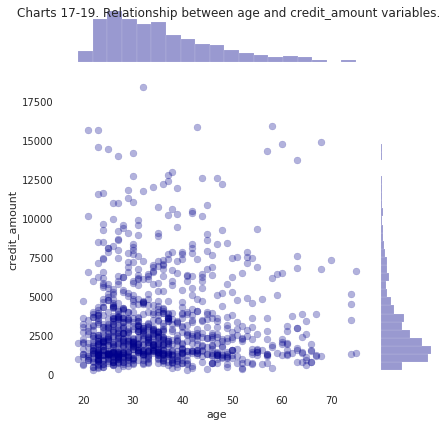

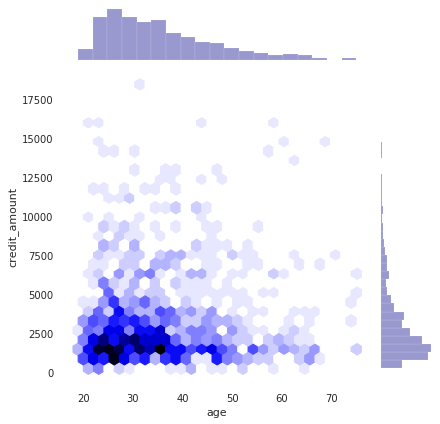

In [49]:
g = sns.jointplot(x=data["age"], y=data["credit_amount"], kind='scatter', color = 'darkblue', alpha = 0.3)
g.fig.suptitle('Charts 17-19. Relationship between age and credit_amount variables.')
sns.jointplot(x=data["age"], y=data["credit_amount"], kind='hex', color = 'darkblue')

### Relationship between marital status and credit amount.

In [50]:
## A91 : male : divorced/separated, 
## A92 : female : divorced/separated/married, 
## A93 : male : single, 
## A94 : male : married/widowed, 
## A95 : female : single

Text(0.5, 1.0, 'Chart 20. Relationship between credit_amount and personal variables')

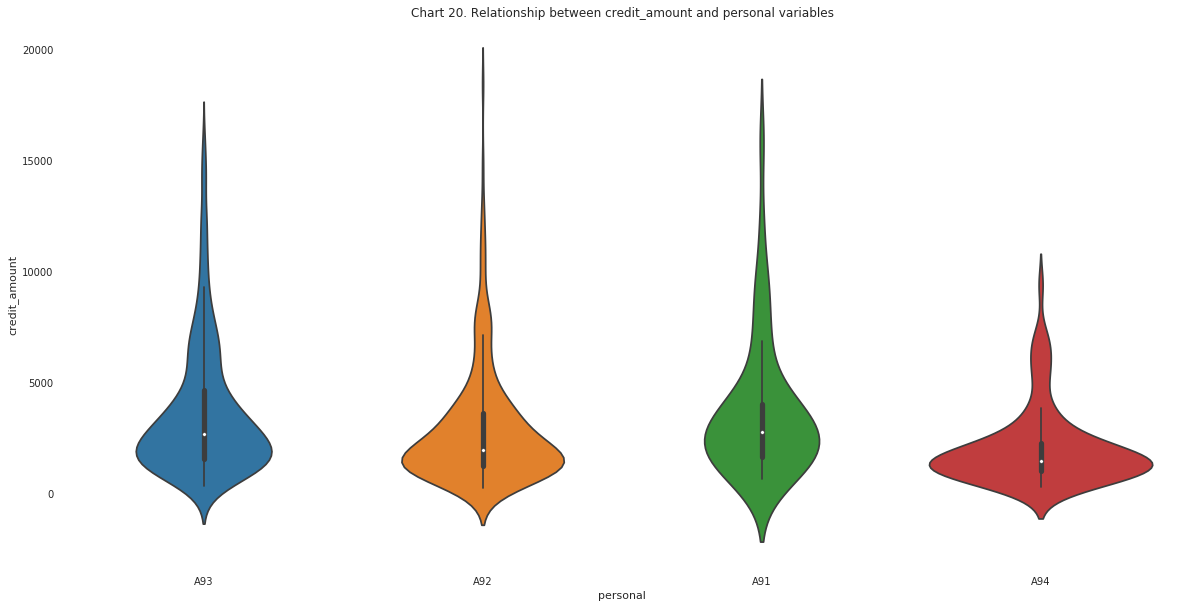

In [51]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.violinplot(data.personal, data.credit_amount).set_title('Chart 20. Relationship between credit_amount and personal variables')

Married/widowed males do not take loans over about 10,000. The lowest loan values dominate in this group.  

 The borrowers of the highest amounts are divorced/separated/married females and divorced/separated males.  

### Loan amount and loan purpose

In [52]:
## A40 : car (new), 
## A41 : car (used), 
## A42 : furniture/equipment, 
## A43 : radio/television, 
## A44 : domestic appliances, 
## A45 : repairs, 
## A46 : education, 
## A47 : (vacation - does not exist?), 
## A48 : retraining, 
## A49 : business, 
## A410 : others

Text(0.5, 1.0, 'Chart 21. Relationship between credit_amount and purpose variables')

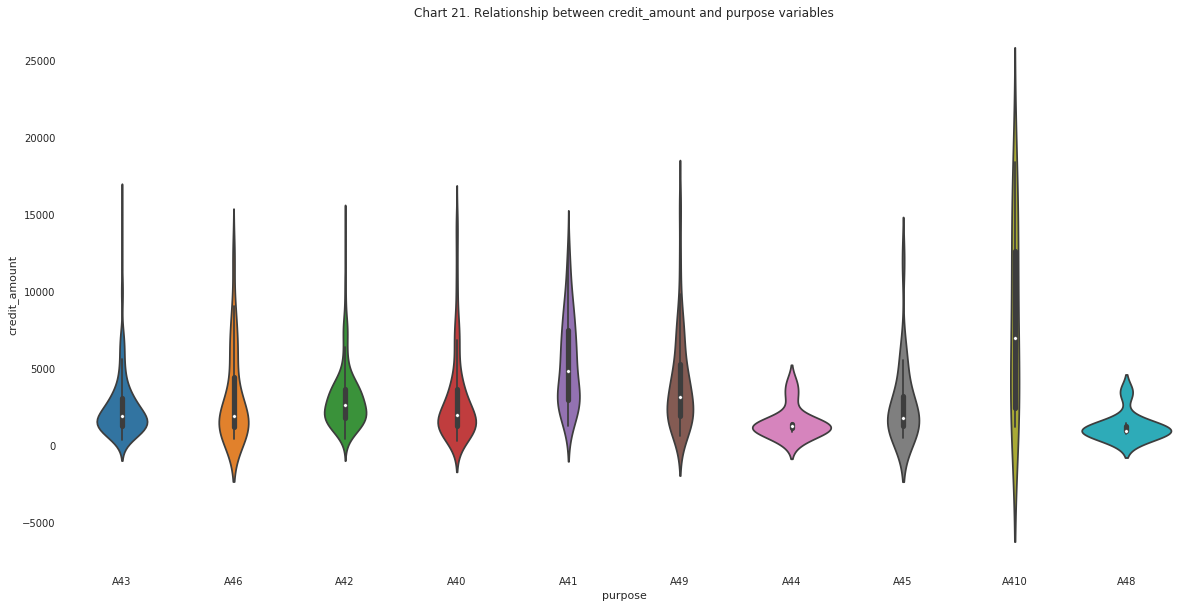

In [53]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.violinplot(data.purpose, data.credit_amount).set_title('Chart 21. Relationship between credit_amount and purpose variables')

There is an evident relationship between variables. The loans of customers declaring willingness to buy a new car are on average lower than the loans of people taking a loan for a used vehicles!!! The highest loans (except for the other category) are taken for business purposes.

### Credit amount and credit history

In [54]:
# A30: no credits taken/ all credits paid back duly, 
# A31: all credits at this bank paid back duly, 
# A32: existing credits paid back duly till now, 
# A33: delay in paying off in the past, 
# A34 : critical account/ other credits existing (not at this bank)

Text(0.5, 1.0, 'Chart 22. Relationship between credit_amount and credit_history')

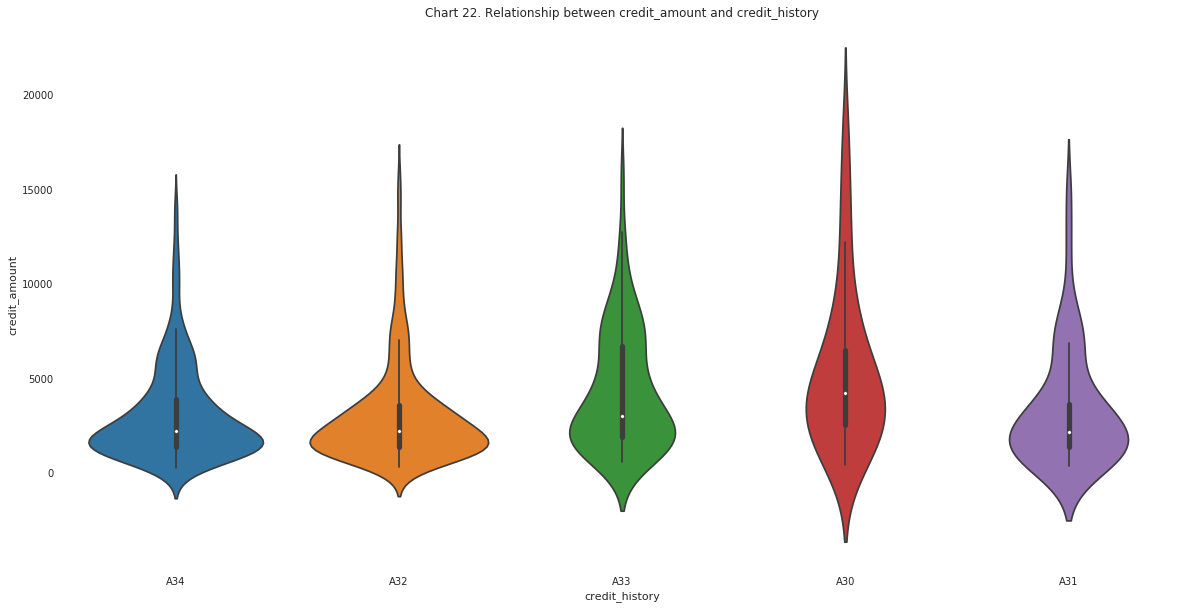

In [55]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.violinplot(data.credit_history, data.credit_amount).set_title('Chart 22. Relationship between credit_amount and credit_history')

The highest loans are taken by people with no credits taken/ all credits paid back duly. But this group also has low loan values.  
The lowest loans dominate among people with critical account/ other credits existing (not at this bank) and existing credits paid back duly till now

### Credit amount and checking_account_status

In [56]:
# Status of existing checking account 
## A11: < 0 DM, 
## A12: 0 <= x < 200 DM, 
## A13 : >= 200 DM / salary assignments for at least 1 year, 
## A14 : no checking account)

Text(0.5, 1.0, 'Chart 23. Relationship between credit_amount and checking_account_status')

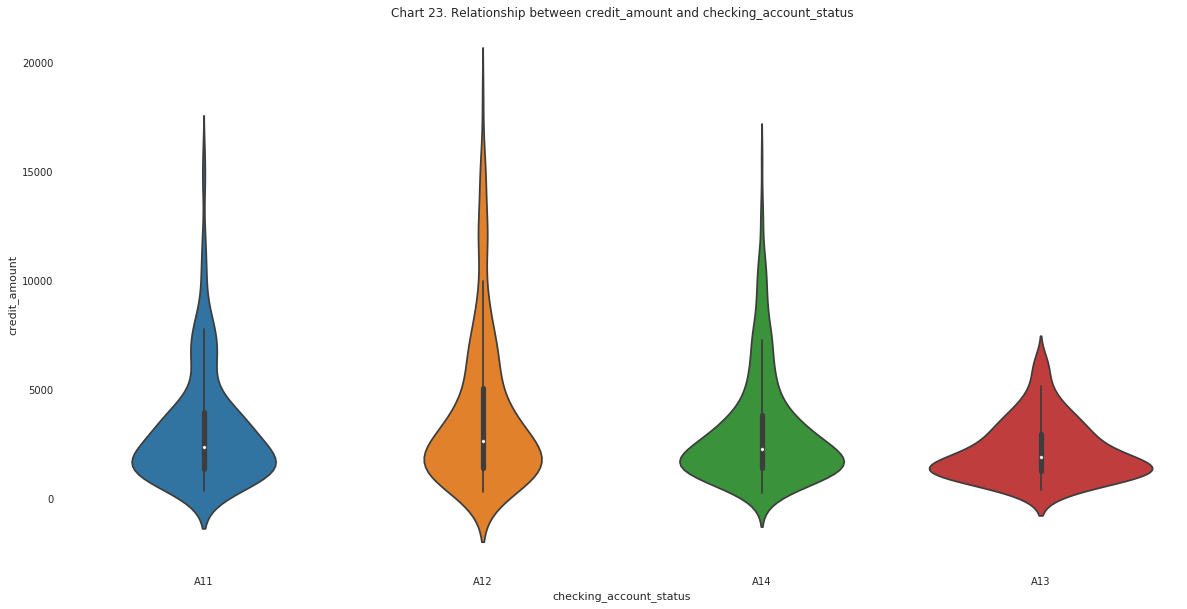

In [57]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.violinplot(data.checking_account_status, data.credit_amount).set_title('Chart 23. Relationship between credit_amount and checking_account_status')

Interesting distribution for A13 ! Salary not realy coresponding with credit amount but people with high salary take smoler loans.

### Credit amount and credit debtor

In [58]:
## A101 : none,
## A102 : co-applicant, 
## A103 : guarantor

Text(0.5, 1.0, 'Chart 24. Relationship between credit_amount and credit_debtor')

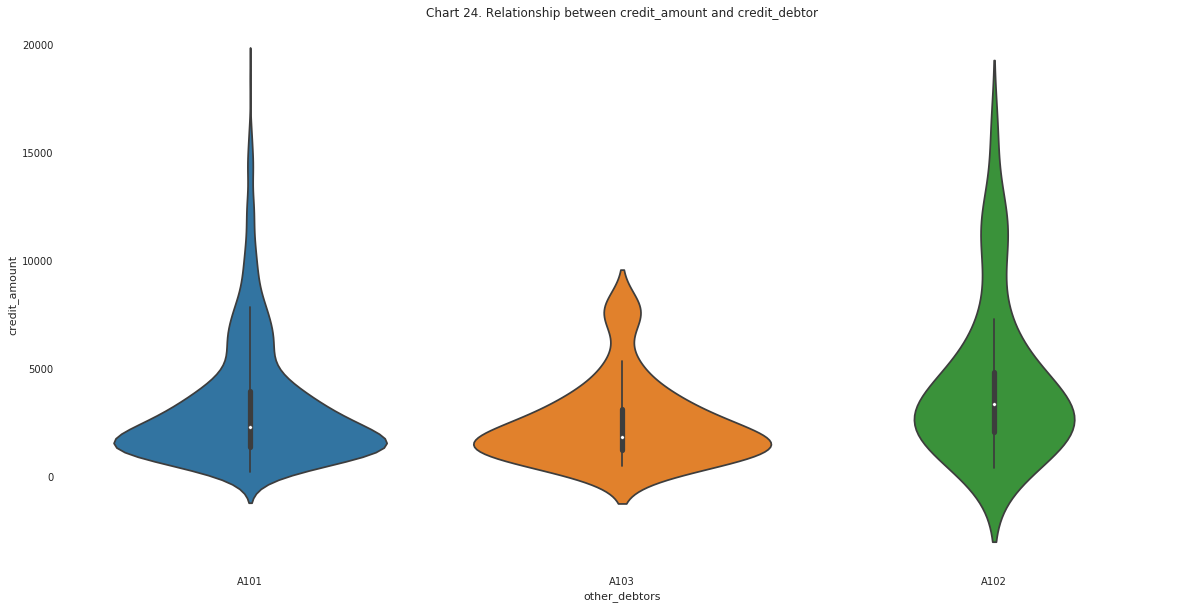

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.violinplot(data.other_debtors, data.credit_amount).set_title('Chart 24. Relationship between credit_amount and credit_debtor')

Guaranteed loans are the lowest. Co-applicant lonas are higher then other at average.